In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from sklearn.metrics import cohen_kappa_score
import lightgbm as ltb
from sklearn import svm
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
plt.style.use("ggplot")
import catboost as ctb

In [19]:
df = pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")

In [20]:
# SAMPLES=500
# RND = 12345
# train_data = df
# frames = [train_data[train_data['quality'] == 8].sample(n=SAMPLES, random_state=RND, replace=True),
#           train_data[train_data['quality'] == 7].sample(n=SAMPLES, random_state=RND, replace=True),
#           train_data[train_data['quality'] == 6].sample(n=SAMPLES, random_state=RND, replace=True),
#           train_data[train_data['quality'] == 5].sample(n=SAMPLES, random_state=RND, replace=True),
#           train_data[train_data['quality'] == 4].sample(n=SAMPLES, random_state=RND, replace=True),
#           train_data[train_data['quality'] == 3].sample(n=SAMPLES//4, random_state=RND, replace=True)]

# train_data = pd.concat(frames)


<AxesSubplot:xlabel='quality', ylabel='count'>

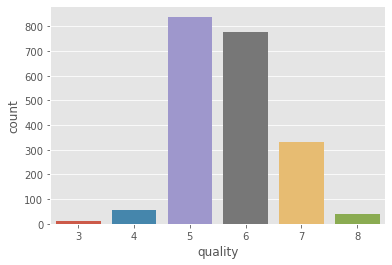

In [21]:
sns.countplot(data = df, x = 'quality')

In [22]:
df = df.drop("Id", axis = 1)
df = df.drop_duplicates()
df = df.reset_index(drop = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2056 non-null   float64
 1   volatile acidity      2056 non-null   float64
 2   citric acid           2056 non-null   float64
 3   residual sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free sulfur dioxide   2056 non-null   float64
 6   total sulfur dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 192.9 KB


In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [25]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NULL value in this dataset nice nice

<AxesSubplot:xlabel='quality', ylabel='count'>

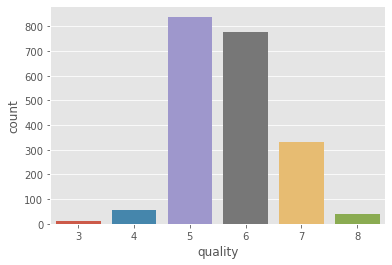

In [26]:
sns.countplot(data = df, x = 'quality')

5,6,7
score for quality is the majority.


In [27]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
df.quality.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

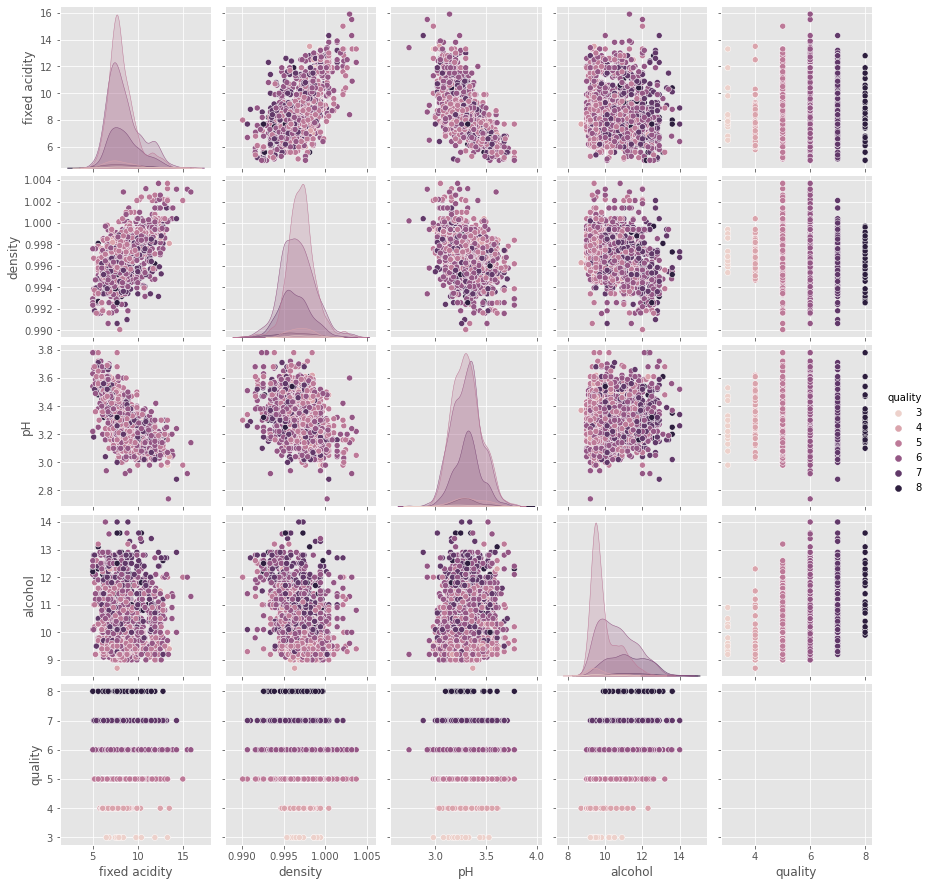

In [29]:
sns.pairplot(df,hue = "quality", vars = ["fixed acidity", "density", "pH", "alcohol", "quality"])

<Figure size 576x576 with 0 Axes>

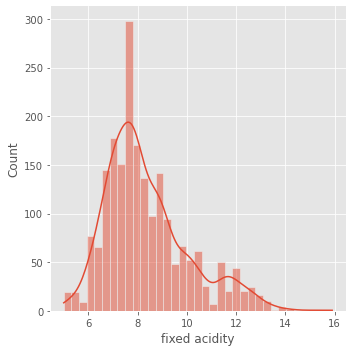

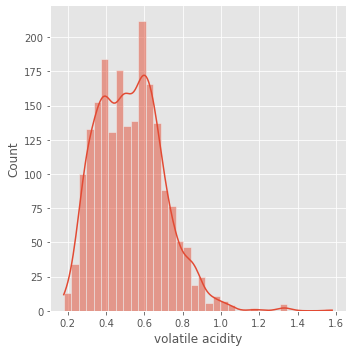

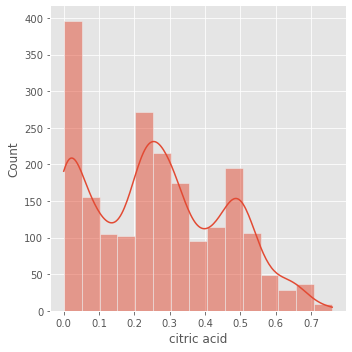

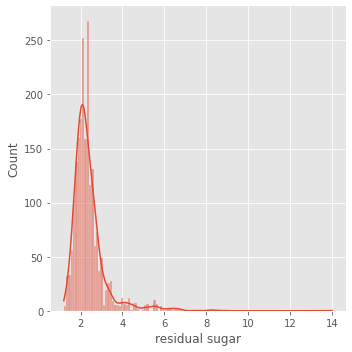

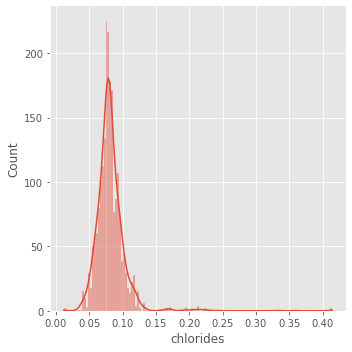

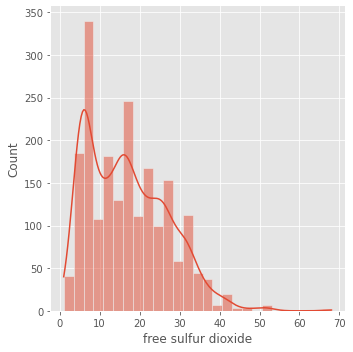

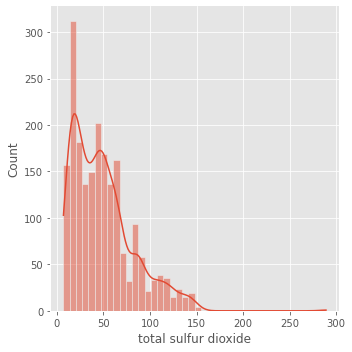

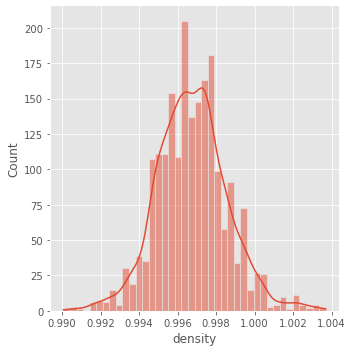

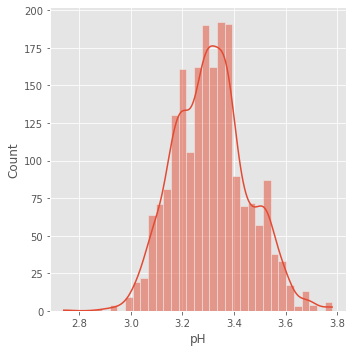

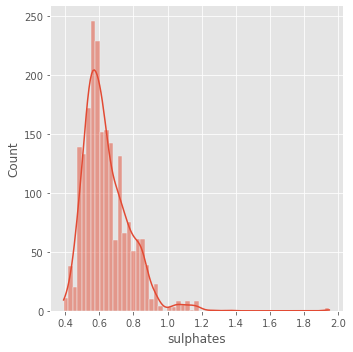

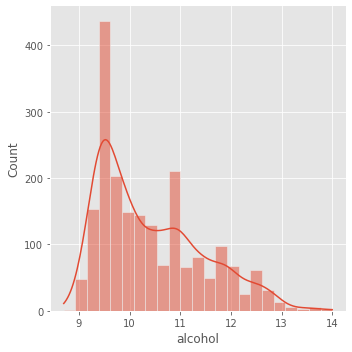

In [30]:
plt.figure(figsize = (8,8))
columns_list = list(df.columns)
columns_list.remove('quality')
for i in columns_list:
    sns.displot(data = df, x = i,kde = True)

log tranformation, heterodicity, linearity due to the skewness


<AxesSubplot:>

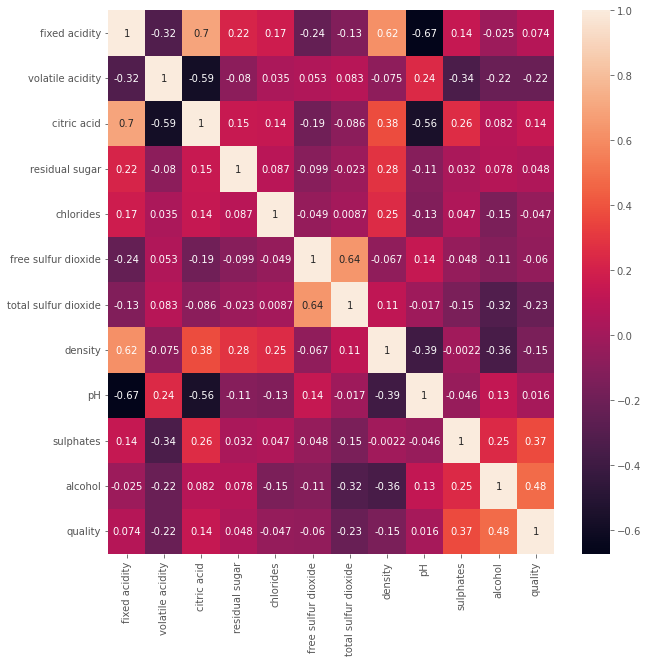

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)

boxplot, outlier....

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

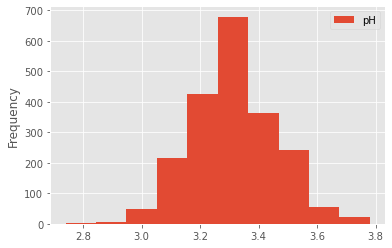

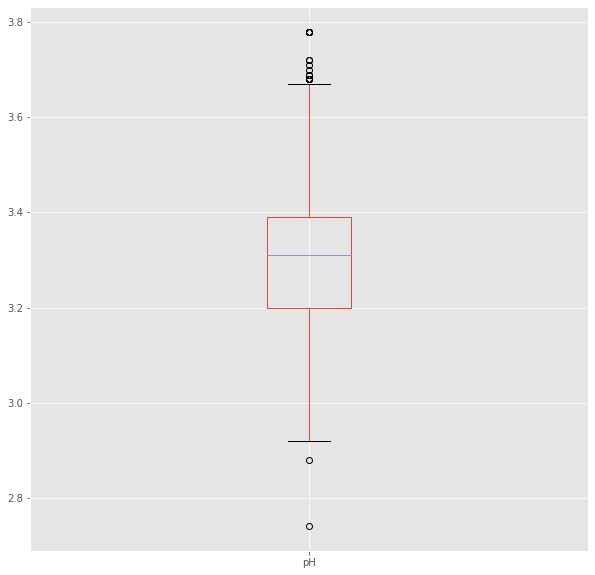

In [32]:
plt.figure(figsize=(10,10))
df.plot.hist(y = 'pH')
plt.figure(figsize = (10,10))
df.boxplot(column = 'pH')

This problem could be treated as both classification and regression. but this time, I choose classification to increase the metrics. 

Clustering did not work well

In [33]:
# from sklearn.cluster import KMeans

# def clustering(df, test_df):
    
#     X = df.copy()
    
#     Test_scaled = test_df.copy()
    
#     num_cluster = 5 # cluster数

#     features = ["alcohol", "sulphates", 'density']

#     # Standardize
#     X_scaled = df.loc[:, features]
#     Test_scaled = test_df.loc[:, features]
    
#     X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
#     Test_scaled = (Test_scaled - Test_scaled.mean(axis=0)) / Test_scaled.std(axis=0)
    
#     # YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
#     kmeans = KMeans(n_clusters = 5, n_init=10, random_state=0)
#     kmeans.fit(X_scaled)
    
#     df["Cluster"] = kmeans.predict(X_scaled)
#     test_df["Cluster"] = kmeans.predict(Test_scaled)
    
# #     X["Distance"] = kmeans.fit_transform(X_scaled)
#     df["Cluster"] = df["Cluster"].astype('int')
#     test_df["Cluster"] =  test_df["Cluster"].astype('int')
# #     X["Distance"] = X["Distance"].astype('int')
    
#     return df

# df = clustering(df, df)

In [34]:
def feature_engineering(df):
    dff = df.copy()
    quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
    df.loc[:, "quality"] = df.quality.map(quality_mapping)
    
    df["total sulfur dioxide"] = df["total sulfur dioxide"].apply(lambda x : np.log(1 + x))
    df["free sulfur dioxide"] = df["free sulfur dioxide"].apply(lambda x : np.log(1 + x))
    df["citric acid"] = df["citric acid"].apply(lambda x : np.log(1 + x))
    df["alcohol"] = df["alcohol"].apply(lambda x : np.log(1 + x))
    
    df["citric acid"] = df["citric acid"].apply(lambda x : np.log(1 + x))

    for i in ["total sulfur dioxide","free sulfur dioxide", "alcohol"]:
        bcx_target, lam = boxcox(df[i])
        df[i] = bcx_target
    
    df["total sulfur dioxide - free sulfur dioxide"] = df["total sulfur dioxide"] - df["free sulfur dioxide"]
    df["residual sugar * chlorides"] = df["residual sugar"] * df["chlorides"]
    df["fixed acidity + volatile acidity"] = df["fixed acidity"] + df["volatile acidity"]
    df["residual sugar * density"] = df["residual sugar"] * df["density"]
    

    pf = preprocessing.PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
    poly_feats = pf.fit_transform(df.drop(["quality"], axis=1))
    num_feats = poly_feats.shape[1]
    df_tranformed = pd.DataFrame(poly_feats, 
                            columns = [f"f_{i}" for i in range(1, num_feats + 1)])
    df = pd.concat([df_tranformed, df.quality],axis = 1)
    
    for i in df.columns:
        if i != "quality":
            df["{}_bined".format(i)] = pd.cut(df[i], bins = 5, labels = False)
        
    
    
    return df

<Figure size 576x576 with 0 Axes>

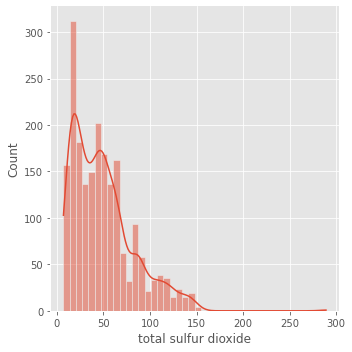

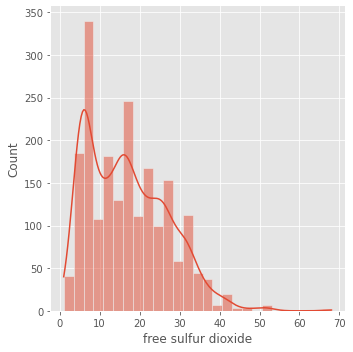

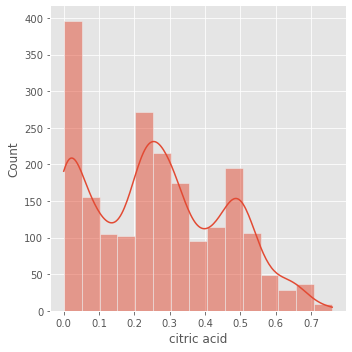

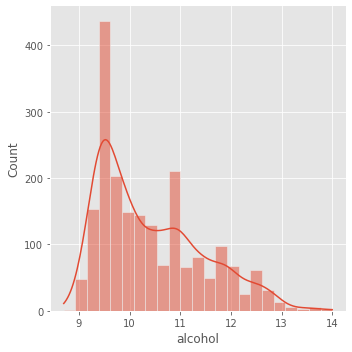

In [35]:
plt.figure(figsize = (8,8))
columns_list = ["total sulfur dioxide", "free sulfur dioxide", "citric acid", "alcohol"]
for i in columns_list:
    sns.displot(data = df, x = i,kde = True)

In [36]:
def make_fold(df, fold):
    df["kfold"] = -1
    df.sample(frac=1).reset_index(drop = True)
    y = df.quality.values
    kf = model_selection.StratifiedKFold(n_splits = fold)
    for f, (t_,v_) in enumerate(kf.split(X = df, y = y)):
        df.loc[v_, 'kfold'] = f
    return df

In [37]:
df = feature_engineering(df)

**Hyparameter search**

In [38]:
def inference(para1,para2):
    
    fold_test = 0
    fold = 5   
    test_list = []
    for i in tqdm(range(fold)):
        df_train = df[df['kfold'] != i]
        df_test = df[df['kfold'] == i]
        model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = para1, penalty = para2)
        model.fit(df_train[cols], df_train.quality)
        
        p = model.predict(df_test[cols]) 
        test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")
        fold_test += test_accuracy

    return fold_test / fold

dropping the Low Variance predictors: Not good for model feature_selection
VarianceThreshould

recursive feature elimination(RFE)

In [39]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       ...
       'f_111_bined', 'f_112_bined', 'f_113_bined', 'f_114_bined',
       'f_115_bined', 'f_116_bined', 'f_117_bined', 'f_118_bined',
       'f_119_bined', 'f_120_bined'],
      dtype='object', length=241)

In [40]:
y = df.quality
X = df.drop(['quality'], axis = 1)

In [41]:
def my_custom_loss_func(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights = "quadratic")

# classifier = RandomForestClassifier(n_jobs = -1)
# param_grid = {"n_estimators" : [100, 200, 300, 400, 500], "max_depth":[1,2,5,7,11,15], 
#              "criterion" : ["gini", "entropy"]}

classifier = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
param_grid = {"penalty":['l2', None], "C" : [0.001,0.01,0.1,0.2, 0.3, 0.4, 1,10,100,1000]}
 
model = model_selection.GridSearchCV(estimator = classifier, param_grid = param_grid, scoring = make_scorer(my_custom_loss_func, greater_is_better=True), verbose=10, 
                                    cv = 5)
model.fit(X,y)
print(f"Best score: {model.best_score_}")
      
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
      print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=0.001, penalty=l2........................................
[CV 1/5; 1/20] END .........C=0.001, penalty=l2;, score=0.402 total time=   0.3s
[CV 2/5; 1/20] START C=0.001, penalty=l2........................................
[CV 2/5; 1/20] END .........C=0.001, penalty=l2;, score=0.352 total time=   0.3s
[CV 3/5; 1/20] START C=0.001, penalty=l2........................................
[CV 3/5; 1/20] END .........C=0.001, penalty=l2;, score=0.387 total time=   0.3s
[CV 4/5; 1/20] START C=0.001, penalty=l2........................................
[CV 4/5; 1/20] END .........C=0.001, penalty=l2;, score=0.332 total time=   0.3s
[CV 5/5; 1/20] START C=0.001, penalty=l2........................................
[CV 5/5; 1/20] END .........C=0.001, penalty=l2;, score=0.412 total time=   0.3s
[CV 1/5; 2/20] START C=0.001, penalty=None......................................
[CV 1/5; 2/20] END .........C=0.001, penalty=No

In [42]:
# fold_train = 0
# fold_test = 0
# fold = 5
# train_list = []
# test_list = []

# for i in tqdm(range(fold)):
#     df_train = df[df['kfold'] != i]
#     df_test = df[df['kfold'] == i]
#     model = svm.SVC()
#     model.fit(df_train[cols], df_train.quality)
#     print(model)
#     a = model.predict(df_train[cols])
#     p = model.predict(df_test[cols]) 
#     train_accuracy = cohen_kappa_score(df_train.quality, a, weights = "quadratic")
#     test_accuracy = cohen_kappa_score(df_test.quality, p, weights = "quadratic")
#     fold_train += train_accuracy
#     fold_test += test_accuracy

# train_list.append(fold_train / fold)
# test_list.append(fold_test / fold)

In [43]:
# train_list = []
# test_list = []
# fold = 5

# for depth in tqdm(range(1,25)):
#     fold_train = 0
#     fold_test = 0
#     for i in range(fold):
#         df_train = df[df['kfold'] != i]
#         df_test = df[df['kfold'] == i]
#         clf = tree.DecisionTreeClassifier(max_depth=depth)
#         clf.fit(df_train[cols], df_train.quality)
#         train_predictions = clf.predict(df_train[cols])
#         test_predictions = clf.predict(df_test[cols]) 
#         train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
#         test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
#         fold_train += train_accuracy
#         fold_test += test_accuracy
        
#     train_list.append(fold_train / fold)
#     test_list.append(fold_test / fold)

In [44]:
# plt.figure(figsize = (10,10))
# sns.countplot(data = sample_submission, x = 'quality')

In [45]:
# train_list = []
# test_list = []
# fold = 5

# for depth in tqdm(range(1,25)):
#     fold_train = 0
#     fold_test = 0
#     for i in tqdm(range(fold)):
#         df_train = df[df['kfold'] != i]
#         df_test = df[df['kfold'] == i]
#         rfc = RandomForestClassifier(max_depth = depth)
#         rfc.fit(df_train[cols], df_train.quality)
#         train_predictions = rfc.predict(df_train[cols])
#         test_predictions = rfc.predict(df_test[cols]) 
#         train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
#         test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
#         fold_train += train_accuracy
#         fold_test += test_accuracy

#     train_list.append(fold_train / fold)
#     test_list.append(fold_test / fold)